## Pauta Control Recuperativo 2 INFO273. Redes de Colas
Utilice papel y lápiz para los desarrollos teóricos, les toma una foto y los incorpora como imagen en este notebook.
Para las partes que requieren cáculos matemáticos utilice código incrustado (en R o Python según sea su conveniencia).
Suba la carpeta comprimida con sus respuestas al espacio definido en siveducMD.

Considere el modelo de un sistema informático que consta de un procesador y dos unidades de disco magnético idénticas. Los trabajos del sistema siguen el comportamiento de un servidor central. Las razones de visita y los tiempos de servicio (en segundos) se detallan en la siguiente tabla:

$$\begin{array}{| c | c | c | c |}
\hline
\text{Nodo} & \text{Dispositivo} & \text{Tiempo medio} & \text{Tasa}  \\
&& \text{de servicio} & \text{de visitas} \\ \hline
1 & \text{Procesador (1)} & 0,01 & 25 \\
2 & \text{Disco A (2)} & 0,04 & 12 \\
3 & \text{Disco B (3)}& 0,04 & 12 \\ \hline
\end{array} $$

**(1)** Suponga  que el sistema es sometido a una carga transaccional, con una tasa llegadas de dos trabajos por segundo. Modele este sistema con una red de colas abierta y calcule:

**(a)**  Para cada nodo la utilización, número medio de trabajos y tiempo de respuesta. ¿Cuál es el tiempo de respuesta del sistema informático?

**(b)**  ¿Cuál es la productividad (tasa de proceso) máxima que soporta este sistema?

**(c)**  ¿Qué pasaría si se reemplazan los dos discos por uno nuevo con un tiempo de servicio de 0,03 segundos? ¿Cuál es el nuevo tiempo de respuesta?

**(2)**.  Suponga ahora que el sistema soporta una carga interactiva de 20 usuarios con un tiempo medio de reflexión de 3 segundos. Modele este sistema con una red de colas cerrada y calcule:

**(a)**  Para cada nodo la utilización, número medio de trabajos y tiempo de respuesta. ¿Cuál es el tiempo de respuesta del sistema informático?

**(b)**  Varie el número de clientes desde k=20 a 50 y grafique tasas de proceso. Interprete sus resultados. 

**(c)**  ¿Qué pasaría si se reemplazan los dos discos por uno nuevo con un tiempo de servicio de 0,03 segundos? Compare este resultado con el caso transaccional y justifique la diferencia existente.

**Respuesta 1**

**(a)** Modelamos el sistema como una red abierta en que se puede calcular la demanda de cada nodo como:
$$D_i = \frac{v_i}{\mu_i} = v_i E(S_i) \qquad \text{y también} \qquad \rho_i = \gamma D_i\qquad \text{con} \qquad \gamma= 2[p/s]$$

Además 

$$L_i = \frac{\rho_i}{1-\rho_i},\qquad R_i = \frac{L_i}{\lambda_i}, \qquad R = \frac{\sum L_i}{\gamma} \qquad \text{con} \qquad \lambda_i= \gamma v_i$$

Calculando estos valores para cada nodo, tenemos:

$$\begin{array}{| c | c | c | c | c| c|c| c|c|}
\hline
\text{Nodo} & \text{Dispositivo} & \text{Tiempo medio} & \text{Tasa} & \text{Demanda} & \rho_i & L_i & \lambda_i & R_i \\
&& \text{de servicio }E(S_i) & \text{de visitas }v_i & D_i & & &\\ \hline
1 & \text{Procesador} & 0,01 & 25  & 0,25 & 0,50 & 1 & 50 & 0,02\\
2 & \text{Disco A} & 0,04 & 12 & 0,48& 0,96  & 24 & 24 & 1\\
3 & \text{Disco B}& 0,04 & 12 & 0,48 & 0,96 & 24 & 24& 1\\ \hline
\end{array} $$

Y finalmente
$$ R = \frac{1+24+24}{2} = 24,5[s]$$

**(b)** La tasa de proceso máxima $\gamma_{max}$ es la que permiten las condiciones de equilibrio:
$$\rho_i= \gamma D_i < 1, i=1,2,3$$

es decir 

$$\gamma_{max} < \min\{\frac{1}{0,25}, \frac{1}{0,48}\} = 2,083333$$

**(c)** En el nuevo sistema, la tasa de visita del nodo disco (2) será 24 y si $E(S_2) = 0,03$ entonces

$$\rho_{2} = \gamma v_{2} E(S_{2}) = 2*24*0,03 = 1,44 > 1$$

No se alcanza el equilibrio y el tiempo de respuesta aumenta indefinidamente.

**Respuesta 2**

La red cerrada contiene un nuevo nodo,el nodo que modela a los clientes de la carga interactiva,  con tasa de servicio dependiente de la carga:
$$\mu_{\text{Clientes}}= \frac{k}{3} \qquad \text{con k el número de clientes en estado de reflexión}$$

Si consideramos la red abierta equivalente, reemplazando la transición desde el nodo de clientes al procesador (probabilidad de ruteo 1), entonces:
$$v_0 = 1* v_{\text{Clientes}}= 1 \implies v_{\text{Clientes}}= 1 $$

In [13]:
##(a)
K=20
M=4
L <- rep(0,M)
R <- rep(0,M)
U <- rep(0,M)
# nodo 1 es el nodo cliente
u <- c(1/3,100,25,25)
v <- c(1,25,12,12)
prob <- matrix(1,nrow=K+1,ncol=M)
nprob <- matrix(1,nrow=K+1,ncol=M)
# Cálculo de mu_i(j), i=1,2,3,4 y j=1,...K
mu <- matrix(0,nrow=K,ncol=M)
mu[1,] <- u
for (k in 2:K){
    mu[k,]<- c(u[1]*k,u[2],u[3],u[4])
}

#algoritmo iterativo para calcular R, T, L y U
for (k in 1:K){   
    R <- rep(0,M)  
    for (j in 1:k){
        R <- R + (prob[j,]*rep(j,M)/mu[j,])
    }
    T <- k/(t(v)%*%R)
    L <- rep(0,M)
    sum <- rep(0,M)
    for (j in 1:k){
        nprob[j+1,] <- rep(T,M)*(v/mu[j,])*prob[j,]
        sum <- sum + nprob[j+1,]
        L <- L + rep(j,M)*nprob[j+1,]
    }
    U <- sum
    nprob[1,] <- rep(1,M) - U
    prob <- nprob  
}
#tasa de proceso
#número de ciclos completos por unidad de tiempo.
print(T)
#medidas de desempeño por nodo
print(rbind(L,U,R))
#tiempo medio de respuesta del sistema 
#(lo que demora un cliente interactivo en todo un ciclo)
print(sum(L)/T)

         [,1]
[1,] 1.930912
       [,1]       [,2]      [,3]      [,4]
L 5.7927354 0.92124592 6.6430094 6.6430094
U 0.9971866 0.48272795 0.9268377 0.9268377
R 3.0000000 0.01908416 0.2866957 0.2866957
        [,1]
[1,] 10.3578


[1] 0.9977932 0.5089049 0.9770973 0.9770973


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.975   1.241   2.017   2.036 

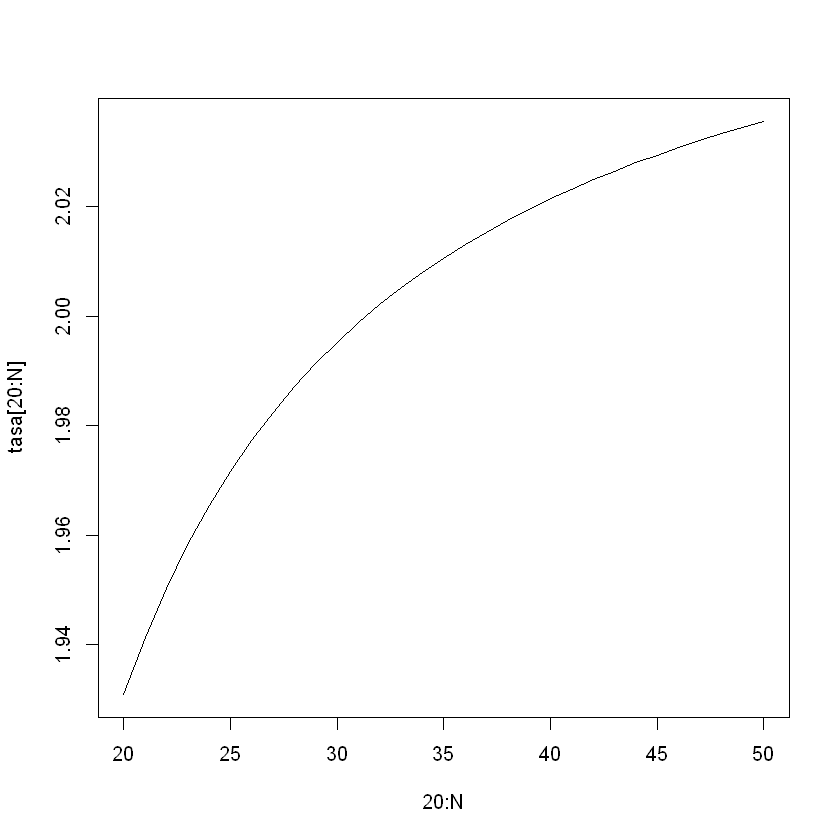

In [10]:
#(b)
N=50
tasa <- rep(0,N)
for (K in 20:N){
M=4
L <- rep(0,M)
R <- rep(0,M)
U <- rep(0,M)
u <- c(1/3,100,25,25)
v <- c(1,25,12,12)
prob <- matrix(1,nrow=K+1,ncol=M)
nprob <- matrix(1,nrow=K+1,ncol=M)
# Cálculo de mu_i(j), i=1,2,3,4 y j=1,...K
mu <- matrix(0,nrow=K,ncol=M)
mu[1,] <- u
for (k in 2:K){
    mu[k,]<- c(u[1]*k,u[2],u[3],u[4])
}

#algoritmo iterativo para calcular R, T, L y U
for (k in 1:K){   
    R <- rep(0,M)  
    for (j in 1:k){
        R <- R + (prob[j,]*rep(j,M)/mu[j,])
    }
    T <- k/(t(v)%*%R)
    L <- rep(0,M)
    sum <- rep(0,M)
    for (j in 1:k){
        nprob[j+1,] <- rep(T,M)*(v/mu[j,])*prob[j,]
        sum <- sum + nprob[j+1,]
        L <- L + rep(j,M)*nprob[j+1,]
    }
    U <- sum
    nprob[1,] <- rep(1,M) - U
    prob <- nprob  
}
tasa[K] = T
}
plot(20:N,tasa[20:N],type="l")
print(U)
summary(tasa)


De acuerdo al gráfico vemos que la tasa de proceso del sistema tiene una cota sobre $2.03 [tr/s]$ que está determinada por la capacidad de los discos que con 50 clientes están cerca de la saturación. La cota debiera ser 2.083 como en (1)

In [12]:
##(c)
K=20
M=3
L <- rep(0,M)
R <- rep(0,M)
U <- rep(0,M)
u <- c(1/3,100,33.33)
v <- c(1,25,24)
prob <- matrix(1,nrow=K+1,ncol=M)
nprob <- matrix(1,nrow=K+1,ncol=M)
# Cálculo de mu_i(j), i=1,2,3,4 y j=1,...K
mu <- matrix(0,nrow=K,ncol=M)
mu[1,] <- u
for (k in 2:K){
    mu[k,]<- c(u[1]*k,u[2],u[3])
}

#algoritmo iterativo para calcular R, T, L y U
for (k in 1:K){   
    R <- rep(0,M)  
    for (j in 1:k){
        R <- R + (prob[j,]*rep(j,M)/mu[j,])
    }
    T <- k/(t(v)%*%R)
    L <- rep(0,M)
    sum <- rep(0,M)
    for (j in 1:k){
        nprob[j+1,] <- rep(T,M)*(v/mu[j,])*prob[j,]
        sum <- sum + nprob[j+1,]
        L <- L + rep(j,M)*nprob[j+1,]
    }
    U <- sum
    nprob[1,] <- rep(1,M) - U
    prob <- nprob  
}

print(rbind(L,U,R))
print(T)

       [,1]      [,2]       [,3]
L 4.1662456 0.5318283 15.3019261
U 0.9844897 0.3471871  0.9999989
R 3.0000000 0.0153182  0.4591042
         [,1]
[1,] 1.388749


Con esta nueva configuración el disco esta casi a utilización máxima, pero aún no se alcanza la saturación. El comportamiento es distinto a aquel de la red abierta, porque la población es finita, y por lo tanto el sistema no sufre la misma sobrecarga. El número máximo de trabajos en cada cola no puede ser mas de 20.
